### Charles Douglas 

### Project #5, 
### Title: EasyVisa Project
### October 7, 2022

### Post Graduate program in Data Science and Business Analytics, McCombs School of Business, University of Texas-Austin

### This project shows Python coding skills addressing balanced class weights and hyperparameter tuning for machine learning models including; DecisionTreeClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, and XGBClassifier.



# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## **Table of Contents**

###  Section #1 - Problem Statement
###  Section #2 - Data Overview
###  Section #3 - Exploritory Data Analysis
###  Section #4 - Data Preprocessing 
###  Section #5 - Mini-Exploritory Data Analysis
###  Section #6 - Data Preparation for Modeling
###  Section #7 - Building bagging and boosting models
###  Section #8 - Tuning hyperparameters
###  Section #9 - Model Performance Comparison and Conclusions
###  Section #10 - Actionable Insights and Recommendations

## **Section #1 - Problem Statement**

### **Problem Statement**
Companies seek to bring foreign workers into the United States to meet their labor needs when insufficient US workers are available. Attracting the right talent is a crucial factor for companies to remain competitive. When a candidate does not receive Certification, valuable time is lost processing an alternative candidate. The Office of Foreign Labor Certification (OFLC) is the federal agency tasked to process job certification applications and grant certifications for foreign workers for US employers. The number of applicants is increasing every Year. The process of reviewing every case is a tedious and time-consuming task. There is a need for a more efficient process to help maintain the US global competitiveness.


### **This analysis provides these deliverables for the client**
OFLC has hired your firm EasyVisa for data-driven solutions that identify candidates with a higher chance of VISA approval. Your firm will build a classification model:

1-  Facilitate the process of visa approvals.

2-  Recommend a suitable profile for the applicants for whom the Visa should be certified or denied based on the drivers that significantly influence the case status. 

### Importing necessary libraries and data

In [ ]:
/usr/local/bin/python3 -m pip install ipykernel ipython -U --fore-reinstall

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scipy statistal libraries
import scipy.stats as stats

#libraries for model building and tuning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier,RandomForestClassifier, 
                              GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#libraries for metrics and statistics
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

- Read data file

In [2]:
# read data file
data = pd.read_csv('/Users/cdouglas/Downloads/EasyVisa.csv')

- Create duplicate of data file to avoid changes to original data values 

In [3]:
# copying data file to avoid any changes to original data
df = data.copy(deep=True)

## **Section #2 - Data Overview**

- Observations
- Sanity checks

- show basic data file structure and random sample

In [4]:
# Get number of records and number of variable
df.shape

(25480, 12)

In [5]:
# show a random sample of the data file
df.sample(n=10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


In [6]:
# show variable labels and variable data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- Check for null values and duplicate records  

In [7]:
# check for null values 
df[df.isnull()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
# checking for duplicate records
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Statistical summary of quantitative and qualitative variables

In [9]:
# statistical summary of the quantitative variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [10]:
# statistical summary of the qualitative variables
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


#### Convert variables with a object data format to a catagorical data format

In [11]:
# show catagorical variables
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
# Convert to catagorical data format
for i in cols.columns:
    df[i] = df[i].astype('category')

In [13]:
# check on format conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


- Identify Sub Categories

In [14]:
# Checking number of catagorical levels
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

- List catagorical levels

In [15]:
for i in cols.columns:
    print('Unique values in', i, 'are :')
    print(cols[i].value_counts())
    print('*' * 10)

Unique values in case_id are :
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
**********
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**********
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**********
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**********
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**********
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island

### **Data Overview Comments**

#### **Data Structure**
* The data file has 25480 records with 12 variables
* no null values or duplicate records identified
* Nine varables are formated as objects and converted to categorical format
* Catagorical variables may be converted to dummy variables
* Categorical levels are: 'continent' - 6 levels, 'education_of_employee' - 4 levels, 'has_job_experience' - 2 levels, 'requires_job_training' - 2 levels, 'unit_of_wage' - 4 levels, 'region_of_employment' - 5 levels, 'full_time_position' - 2 levels, 'case_status' - 2 levels
* The variable 'unit_of_wage' may need to be macthed with the approriate unit_of_wage to facilite comparison.
* The varable 'yr_of_estab' is formated as an integer and many need to be converted to a date format
* The remaing three variables are formatted as integer or floating point numbers

#### **Review of Variables**
* 'case_id' - 25480 unique case id numbers
* 'continent': Asia, Europe, North America, South America, Africa, and Oceania            192
* 'education_of_employee': Bachelor's, Master's, High School, and Doctorate 
* 'job_experience': Y or N
* 'requires_job_training': Y or N
* 'yr_of_estab': the mean year - 1976, youngest firm - 2016, oldest firm - 1800
* 'no_of_employees': mean - 5667, min - negative 26, Max - 602069
* 'region_of_employment': Northeast, South, West, Midwest, and Island  
* 'prevailing_wage': mean - 74,445, minimum - 2.14, maximum - 319, 210.27
* 'unit_of_wage': Year, Month, Week, and Hour
* 'full_time_position': Y or N
* 'case_status': Certified or Denied

## **Section #3 - Exploratory Data Analysis (EDA)**

* Part 1 - Five Leading questions
* Part 2 - General Exploratory Data Analysis (EDA)

#### Load functions for EDA graphics

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to create labeled barplots

def labeled_barplot2(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### **EDA Part 1- Five Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

In [20]:
# sort education_of_employee variable by case_status for each educational level
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee           
Bachelor's             Certified    0.622142
                       Denied       0.377858
Doctorate              Certified    0.872263
                       Denied       0.127737
High School            Denied       0.659649
                       Certified    0.340351
Master's               Certified    0.786278
                       Denied       0.213722
Name: case_status, dtype: float64

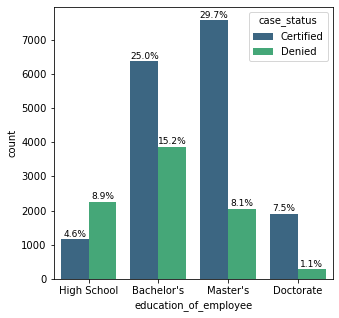

In [21]:
# plot to show individual proportion of accepted vs. denied visa for each educational level
labeled_barplot2(df,'education_of_employee','case_status', order=["High School","Bachelor's","Master's","Doctorate"], perc=True)

#### Comments

Yes, education level does play a role in obtaing a visa. 

* 30% of all applications were certified for a candidate who held a Master's degree.
* Of applicants with a Masters degree, 79% of applicants were accepted
* 25% of all applicants were certified for a candidate who held a Bachelor's degree.
* Of applicants with a Bachelors degree, 62% of applicants were accepted
* 9% of all applicants were certified for a candidate who held a High School diploma.
* Only 34% of High School educated applicants were accepted, out of all applicants with a high school education
* 8% of all applicants were certified for a candidate who held a Doctorate degree.
* Of applicants with a Doctorate degree, 87% of applicatants were accepted

#### 2. How does the visa status vary across different continents? 

In [22]:
# sort accepted by continent
df.groupby('continent')['case_status'].value_counts(normalize=True)

continent               
Africa         Certified    0.720508
               Denied       0.279492
Asia           Certified    0.653105
               Denied       0.346895
Europe         Certified    0.792337
               Denied       0.207663
North America  Certified    0.618773
               Denied       0.381227
Oceania        Certified    0.635417
               Denied       0.364583
South America  Certified    0.578638
               Denied       0.421362
Name: case_status, dtype: float64

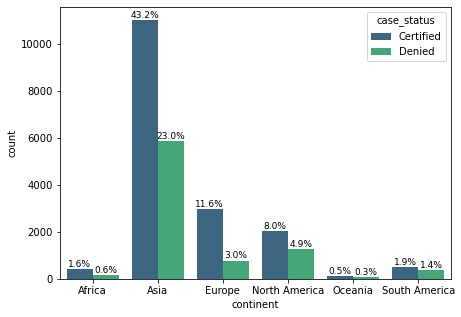

In [23]:
# plot accepted by continent
labeled_barplot2(df,'continent','case_status', order=None, perc=True)

#### Comments
Yes, visa status varies across continents.
* Off all applications, the largest proportion of successful applications are from Asia (42%)
* Of all European applicants, 79% were accepted and is the highest success rate compared to all other continents

Of all applications accepted/denied per continent:
* Asia - 42%/23%, Europe - 12%/3%, North America - 8%/5%, South America -2%/1%, Africa - 2%/1%, and Oceania 1%/0%

Proportion of accepted applications within a continent: 
* Of all Asian applicants, 65% were accepted
* Of all European applicants, 79% were accepted and is the greatest success rate compared to all other locations
* Of all North American applicants, 62% were accepted.
* Of all South American applicants, 58% were accepted.
* Of all African applicants, 72% were accepted.
* Of all Oceania applicants, 64% were accepted.

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [24]:
# sort by job experience vs. case status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True)

has_job_experience           
N                   Certified    0.561341
                    Denied       0.438659
Y                   Certified    0.744764
                    Denied       0.255236
Name: case_status, dtype: float64

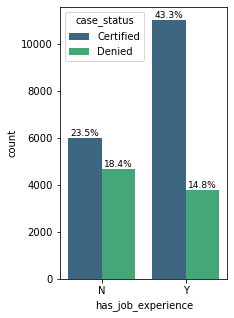

In [25]:
# sort by job experience by approved certification
labeled_barplot2(df,'has_job_experience','case_status', order=None, perc=True)

#### Comments
Yes, work experience influence visa status.
* Of all applications, the largest proportion of successful applications are from applicants with job experience (43%)

Of all applications accepted/denied:
* applicants with job experience - 43%/15%
* applicants with no job experience - 24%/18%

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [26]:
# sort unit wage by case status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage           
Hour          Denied       0.653686
              Certified    0.346314
Month         Certified    0.617978
              Denied       0.382022
Week          Certified    0.621324
              Denied       0.378676
Year          Certified    0.698850
              Denied       0.301150
Name: case_status, dtype: float64

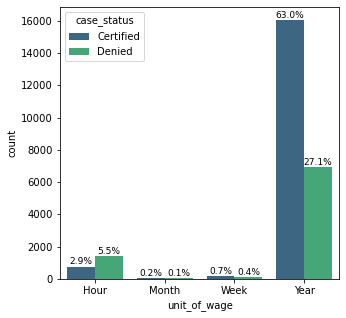

In [27]:
# sort unit wage by case status
labeled_barplot2(df,'unit_of_wage','case_status', order=None, perc=True)

#### Comments
Yes, unit of wage influences visa status.
* Of all applications, the largest proportion of successful applications are from applicants paid Year (63%)
* Of applicants paid by the Year, 70% were accepted and is the higher success rate compared to all other pay periods

Of all applications accepted/denied:
* Year: 63%/27%, Month - 0%/0%, Week - 1%/0%, Hour 3%/6%

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

- Statistics for Year wage

In [28]:
df_pay_year = df[(df["unit_of_wage"]=="Year")]

In [29]:
df_pay_year['prevailing_wage'].describe() 

count     22962.000000
mean      81228.077133
std       49951.473223
min         100.000000
25%       43715.955000
50%       76174.500000
75%      111341.960000
max      319210.270000
Name: prevailing_wage, dtype: float64

- Statistics for Month wage

In [30]:
df_pay_Month = df[(df["unit_of_wage"]=="Month")]

In [31]:
df_pay_Month['prevailing_wage'].describe() 

count        89.000000
mean      87592.864045
std       59525.124924
min        1599.280000
25%       44986.240000
50%       81826.010000
75%      121629.600000
max      264362.950000
Name: prevailing_wage, dtype: float64

- Statistics for Week wage

In [32]:
df_pay_week = df[(df["unit_of_wage"]=="Week")]

In [33]:
df_pay_week['prevailing_wage'].describe() 

count       272.000000
mean      85606.820515
std       44802.704810
min        2183.230000
25%       51408.277500
50%       85075.820000
75%      111331.910000
max      280175.950000
Name: prevailing_wage, dtype: float64

- Statistics for Hour wage

In [34]:
df_pay_hour = df[(df["unit_of_wage"]=="Hour")]

In [35]:
df_pay_hour['prevailing_wage'].describe() 

count    2157.000000
mean      414.570513
std       275.015000
min         2.136700
25%       152.700300
50%       372.652300
75%       637.311100
max       999.919500
Name: prevailing_wage, dtype: float64

#### Comments
Year, Month, and Week wages:
* The mean and median prevailing wage values for Year, Month, and Week are very similar, suggesting Month and Week are misclassified and should be Year
* Plan to convert Month and Week 'unit_of_wage' entries to a Year 'unit_of_wage'

Hourly wage appear too high:
* The mean - $414.57 per hour, and the max $999.92 per hour appears to be high.

Hourly wage appear too low:
* The minimun wage is 2.14 per hour. This wage contradicts the federal minimum wage of$7.25 per hour

In [36]:
df_pay = df.copy(deep=True)

* convert week, and month to year

In [37]:
df_pay['unit_of_wage'].replace({'Week': 'Year', 'Month': 'Year'}, inplace=True)

* drop hour sdue to significant validity problems
* Minimum hourly wage below federal minimum wage
* Median wage and max wage unreasaonbly high

In [38]:
del df_pay['unit_of_wage']

* Deleate entries with annual salary below the federal minimum wage

In [39]:
# drop records with annual salary less than the federal minimum wage
df_pay = df_pay[df_pay.prevailing_wage>15080]

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

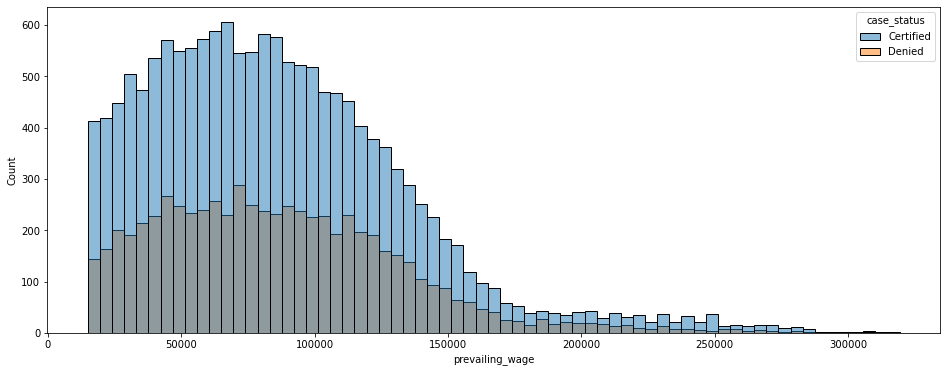

In [40]:
# yearly prevailing wage vs. case_status
plt.figure(figsize=(16,6))
sns.histplot(data=df_pay, x='prevailing_wage', hue='case_status')

#### Comment
Visa status cdoes not appear to change with the prevailing wage.

* Visual evaluation reveals approximatly equal proportion of approved certifications over denied applications across low to high yearly wages.
* Wage distribution right skewed, suggesting many outlier salaries

### **EDA Part 2 - General Exploratory Data Analysis (EDA)**

### Univariate analysis
* Systematic review of each variable in the data set

#### Variable: 'case_id'

In [41]:
# Observations of 'case_id'
df.case_id.describe().T

count      25480
unique     25480
top       EZYV01
freq           1
Name: case_id, dtype: object

#### Comments
* The count and unique items are equivalant suggesting there are no duplicate records
* Plan to drop this variable since it does not contribute to the outcome

#### Variable: 'continent'

In [42]:
# Observations of 'continent'
df.continent.value_counts().T

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

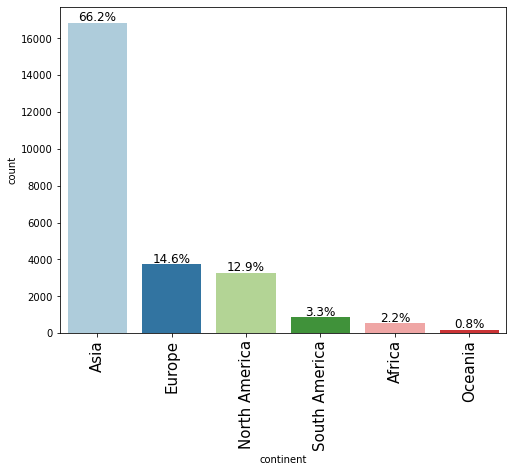

In [43]:
# Observations of 'continent' variable
labeled_barplot(df, 'continent', perc=True)

#### Comments
* Two thirds(66.2%) of applications are from Asia
* Plan to convert to dummy variables

#### Variable: 'education_of_employee'

In [44]:
# Observations of 'education_of_employee'
df.education_of_employee.value_counts().T

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

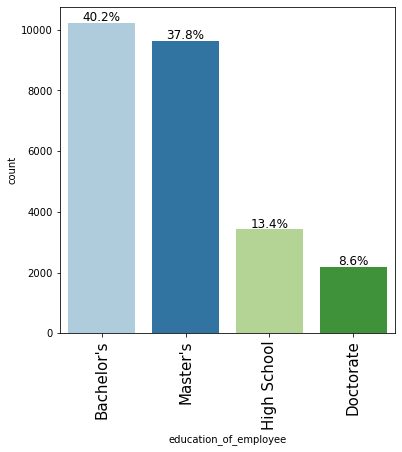

In [45]:
# Observations of 'education_of_employee' variable
labeled_barplot(df, 'education_of_employee', perc=True)

#### Comments
* Most (40%) of applicants have a Bachelor's degree
* Followed closley with 38% of applicants with a Masters
* The smallest proportion is 9% of applicants with a Doctorate
* 13% of applicants reorted no post secondary education
* Plan to convert to dummy variables

#### Variable: 'has_job_experience'

In [46]:
# Observations of 'has_job_experience'
df.has_job_experience.value_counts().T

Y    14802
N    10678
Name: has_job_experience, dtype: int64

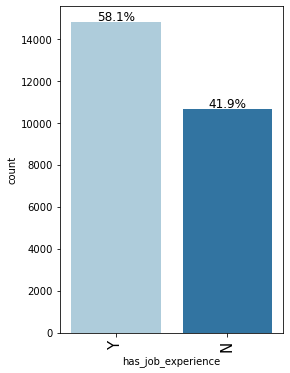

In [47]:
# Observations of 'has_job_experience' variable
labeled_barplot(df, 'has_job_experience', perc=True)

#### Comments
* Majority (58%) of applicants reported previous job experience
* Plan to convert to dummy variables

#### Variable: 'requires_job_training'

In [48]:
# Observations of 'requires_job_traininge'
df.requires_job_training.value_counts().T

N    22525
Y     2955
Name: requires_job_training, dtype: int64

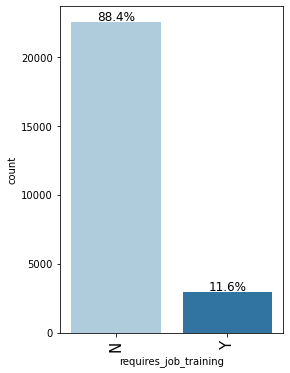

In [49]:
# Observations of 'requires_job_training' variable
labeled_barplot(df, 'requires_job_training', perc=True)

#### Comments
* almost 12 % of applications reported the need for job training
* Plan to convert to dummy variables

#### Variable: 'no_of_employees'

In [50]:
# Observations of 'no_of_employees' variable
df.no_of_employees.describe().T

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

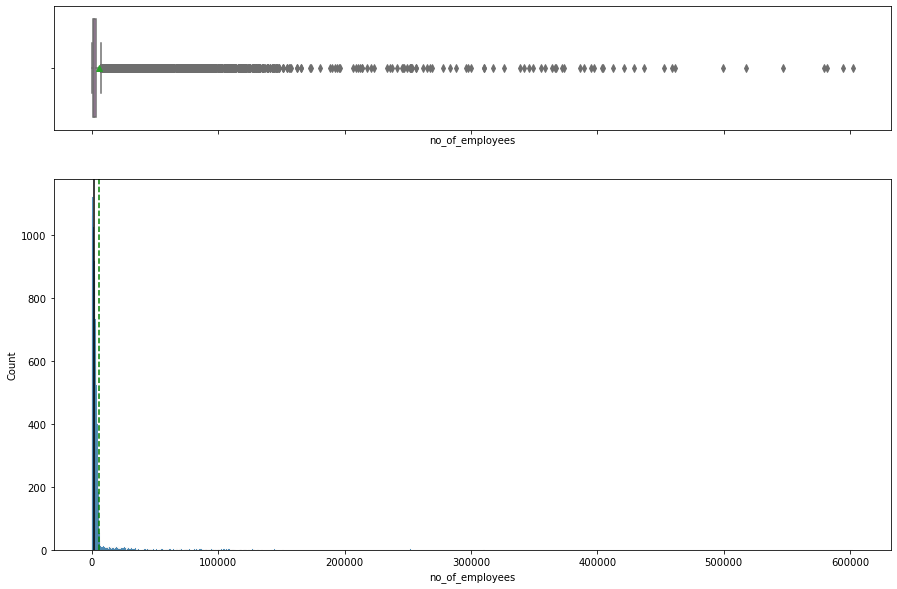

In [51]:
# Observations of 'no_of_employees' variable
histogram_boxplot(df,'no_of_employees')

#### Comments
* The smallest firm is listed with a negative staff, indicating data is suspect
* The mean number of employees is 5667
* The median number of employees is 2009
* The largest company reports over 600K employees, indicating data is suspect
* The three American firms with the most employees are Walmart - 2,200,000, Yum! Brands - 523,000, MacDonald's - 440,000
* The data is severly right skewed

#### Variable: 'yr_of_estab'

In [52]:
# Observations of 'yr_of_estab' variable
df.yr_of_estab.describe().T

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

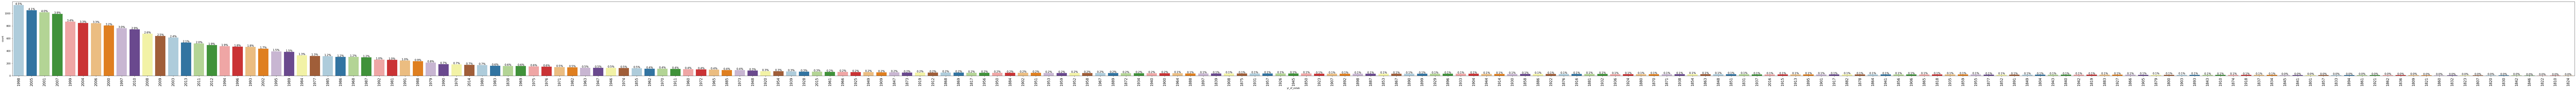

In [53]:
# Observations of 'yr_of_estab' variable
labeled_barplot(df, 'yr_of_estab', perc=True)

#### Comments
* The oldest company reports they were established in the year 1800
* The mean and median report they starting in 1997
* The data is severly right skewed (older firms in the extended tail)

#### Varable: 'region_of_employment'

In [54]:
# Observations of 'region_of_employment'
df.region_of_employment.value_counts().T

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

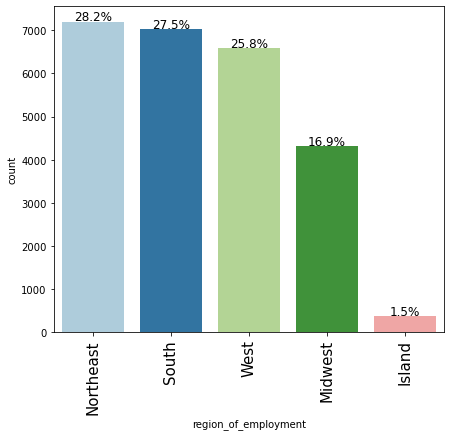

In [55]:
# Observations of 'region_of_employment' variable
labeled_barplot(df, 'region_of_employment', perc=True)

#### Comments
* The Northeast (28%), the South (28%), and the West (26%) have roughly the same number of applicants
* The Midtwest (17%)  and Island (2%) have the remaing applicants
* Plan to convert to dummy variables

#### Varable: 'prevailing_wage'

* show statistics and salry with prevailing wage for Year, Month, Week, and Hour

In [56]:
# sort by mean wage per pay group
df.groupby('unit_of_wage')['prevailing_wage'].mean()

unit_of_wage
Hour       414.570513
Month    87592.864045
Week     85606.820515
Year     81228.077133
Name: prevailing_wage, dtype: float64

#### Yearly pay

In [57]:
df_pay_year = df[(df["unit_of_wage"]=="Year")]

In [58]:
df_pay_year['prevailing_wage'].describe() 

count     22962.000000
mean      81228.077133
std       49951.473223
min         100.000000
25%       43715.955000
50%       76174.500000
75%      111341.960000
max      319210.270000
Name: prevailing_wage, dtype: float64

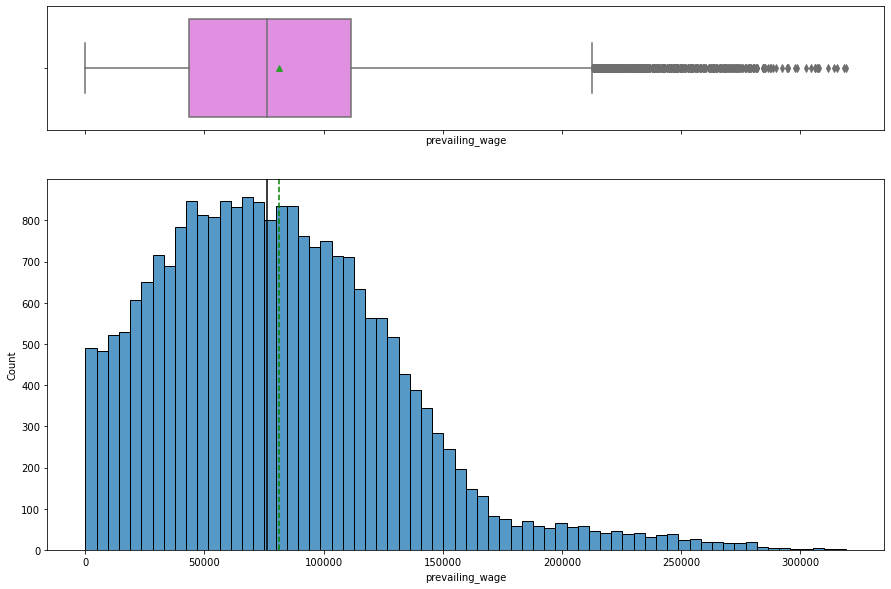

In [59]:
# Prevailing wage for position with yearly salary
histogram_boxplot(df[(df["unit_of_wage"]=="Year")], "prevailing_wage")

#### monthly wage

In [60]:
df_pay_month = df[(df["unit_of_wage"]=="Month")]

In [61]:
df_pay_month['prevailing_wage'].describe() 

count        89.000000
mean      87592.864045
std       59525.124924
min        1599.280000
25%       44986.240000
50%       81826.010000
75%      121629.600000
max      264362.950000
Name: prevailing_wage, dtype: float64

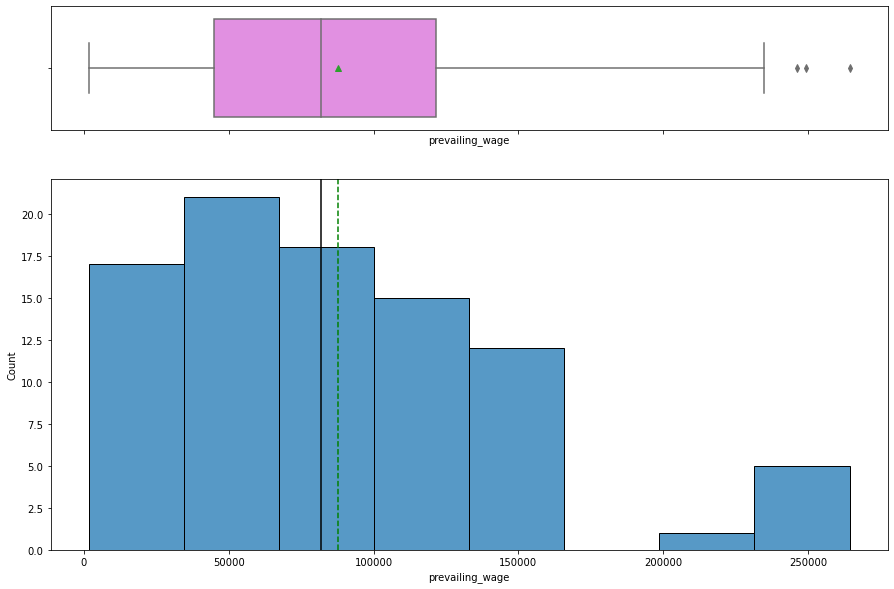

In [62]:
# Prevailing wage for position with monthly pay
histogram_boxplot(df[(df["unit_of_wage"]=="Month")], "prevailing_wage")

#### weekly wage

In [63]:
df_pay_week = df[(df["unit_of_wage"]=="Week")]

In [64]:
df_pay_week['prevailing_wage'].describe() 

count       272.000000
mean      85606.820515
std       44802.704810
min        2183.230000
25%       51408.277500
50%       85075.820000
75%      111331.910000
max      280175.950000
Name: prevailing_wage, dtype: float64

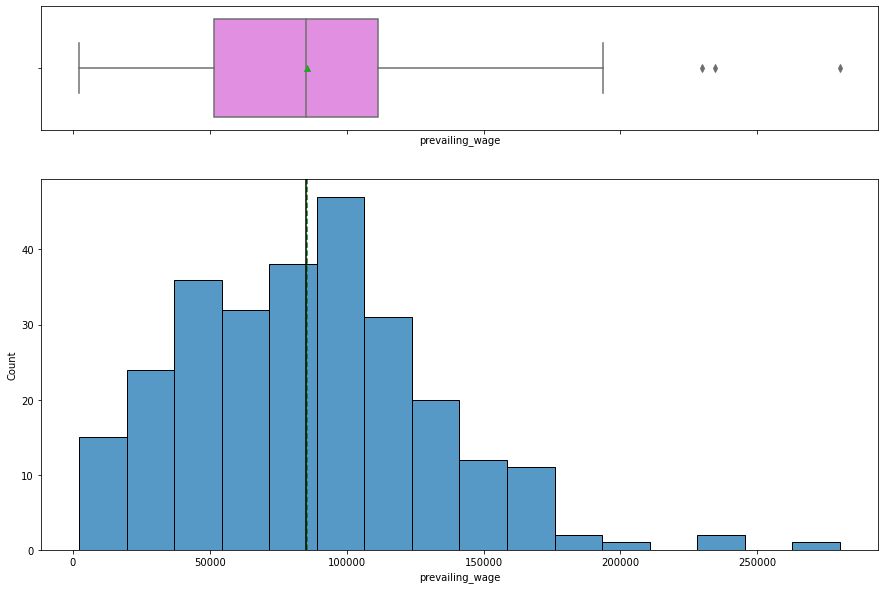

In [65]:
# Prevailing wage for position with monthly pay
histogram_boxplot(df[(df["unit_of_wage"]=="Week")], "prevailing_wage")

#### hourly wage

In [66]:
df_pay_hour = df[(df["unit_of_wage"]=="Hour")]

In [67]:
df_pay_hour['prevailing_wage'].describe() 

count    2157.000000
mean      414.570513
std       275.015000
min         2.136700
25%       152.700300
50%       372.652300
75%       637.311100
max       999.919500
Name: prevailing_wage, dtype: float64

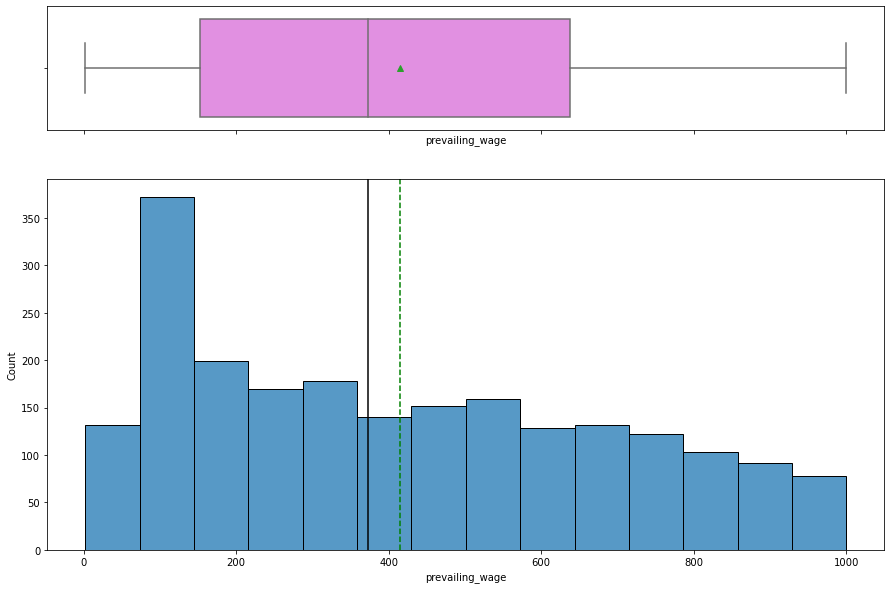

In [68]:
# Prevailing wage for employees paid hourly
histogram_boxplot(df[df["unit_of_wage"]=="Hour"], "prevailing_wage")

#### Comments
Year, Month, and Week:
* The prevailing_wage for Year, Month and YWeek have similar median values, suggesting misclassification.
* There are some prevailing_wage values below the annual pay from the federal mininimum wage ($15,080)
* Plan to merge prevailing_wage of Year, Month, and Week together

Hour: 
* The mean hourly wage - $414 74,445, minimum hourly wage - $2.14, the maximum hourly wage - $319, 210.27 
* The mean and maximum hourly pay appears very high
* The minimum hourly pay is well below the federal minimum wage of $7.25
* Plan to delete values paid hourly wage from analysis due to poor validity

#### Varable: 'unit_of_wage'

In [69]:
# Observations of 'unit_of_wage'
df.unit_of_wage.value_counts().T

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

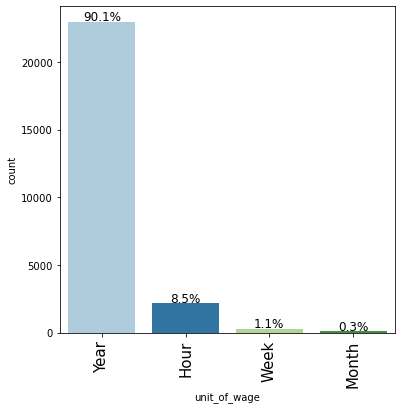

In [70]:
# Observations of 'unit_of_wage' variable
labeled_barplot(df, 'unit_of_wage', perc=True)

#### Comments
* A large majority of employees, over 90% of compensation is paid a yearly salary
* Meging Year, Maoth, and Week values toether accounts for 91% 

#### Varable: 'full_time_position'

In [71]:
# Observations of 'full_time_position'
df.full_time_position.value_counts().T

Y    22773
N     2707
Name: full_time_position, dtype: int64

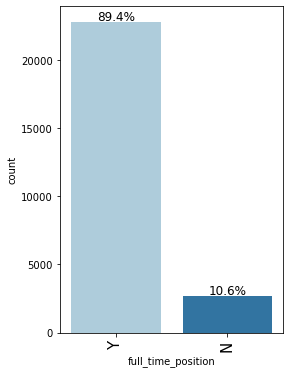

In [72]:
# Observations of 'full_time_position' variable
labeled_barplot(df, 'full_time_position', perc=True)

#### Comments
* 89% of applications are for full-time position

#### Variable: 'case_status'

In [73]:
# Observations of 'case_status'
df.case_status.value_counts().T

Certified    17018
Denied        8462
Name: case_status, dtype: int64

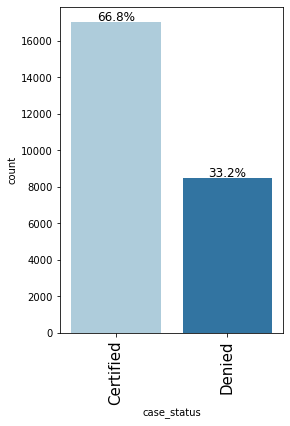

In [74]:
# Observations of 'case_status' variable
labeled_barplot(df, 'case_status', perc=True)

#### Comment
* 67% of applications were accepted (certified)
* 33% of applications were denied

### Bivariate Analysis

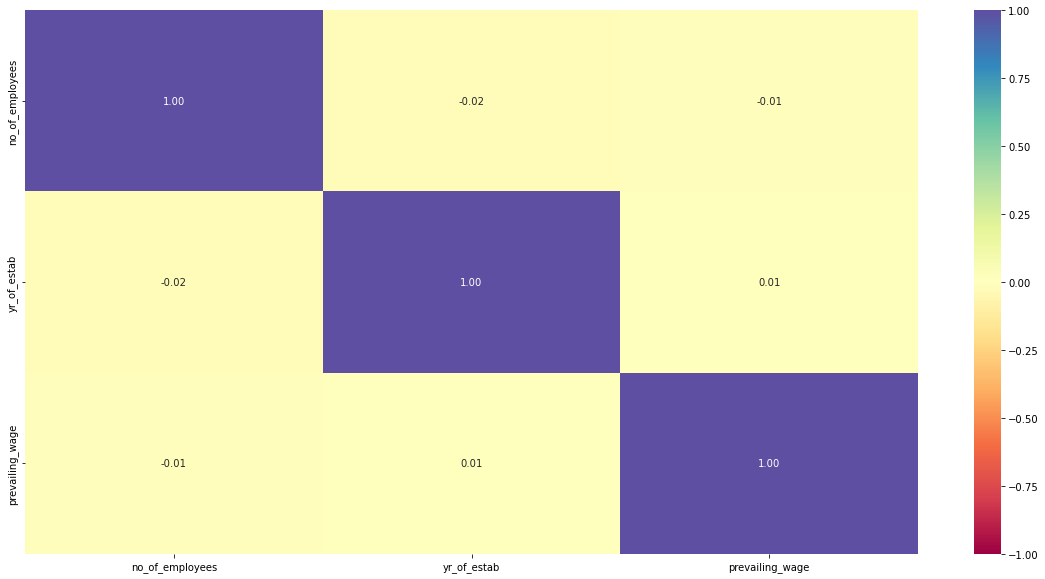

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

#### Comments

* No strong associations observed

#### Applicant location vs. certification


In [76]:
# sort continent by case status
df.groupby('continent')['case_status'].value_counts(normalize=True)

continent               
Africa         Certified    0.720508
               Denied       0.279492
Asia           Certified    0.653105
               Denied       0.346895
Europe         Certified    0.792337
               Denied       0.207663
North America  Certified    0.618773
               Denied       0.381227
Oceania        Certified    0.635417
               Denied       0.364583
South America  Certified    0.578638
               Denied       0.421362
Name: case_status, dtype: float64

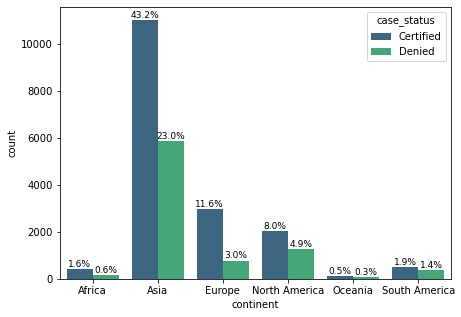

In [77]:
# sort originating location by case status
labeled_barplot2(df,'continent','case_status', order=None, perc=True)

#### Comment
* 43% of applications are accepted for people originating from Asia, and is the largest segment of all applications 
* 80% of applications from people originating in Europe are successful, and is a greater success rate compared to other locactions

#### Applicant education vs. certification

In [78]:
# sort continent by case status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee           
Bachelor's             Certified    0.622142
                       Denied       0.377858
Doctorate              Certified    0.872263
                       Denied       0.127737
High School            Denied       0.659649
                       Certified    0.340351
Master's               Certified    0.786278
                       Denied       0.213722
Name: case_status, dtype: float64

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


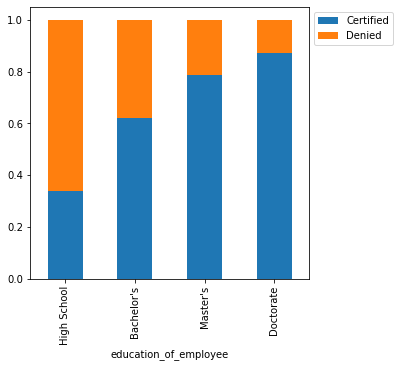

In [79]:
stacked_barplot(df, 'education_of_employee', 'case_status')

#### Comments

* Most (40%) of applicants have a Bachelor's degree, followed closely with 38% of applicants with a Master, and the smallest proportion is 9% of applicants with a Doctorate, 13% of applicants reported no post-secondary education (high school)
* The majority of successful applicants have a Masters’ degree , followed by Bachelor, Doctorial, and last is a high school degree
* Of all degrees, Doctorial applicants enjoy an 87% success rate

#### Applicant job experience vs. certification

In [80]:
# sort continent by case status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True)

has_job_experience           
N                   Certified    0.561341
                    Denied       0.438659
Y                   Certified    0.744764
                    Denied       0.255236
Name: case_status, dtype: float64

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


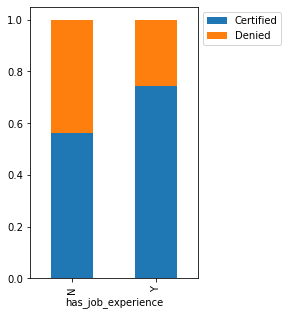

In [81]:
stacked_barplot(df, 'has_job_experience', 'case_status')

#### Commentsare 
* 74% of applicants with job experience are succesful
* 56% of applicants without job experience are succesful

#### Applicant requires job training vs. certification

In [82]:
# sort requires_job_training by case status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True)

requires_job_training           
N                      Certified    0.666459
                       Denied       0.333541
Y                      Certified    0.678849
                       Denied       0.321151
Name: case_status, dtype: float64

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


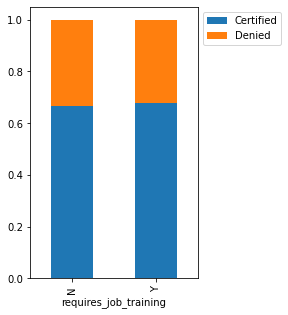

In [83]:
stacked_barplot(df, 'requires_job_training', 'case_status')

#### Comments
* 68% of people who do not need training have succesful applications
* 67% of people with who needed training have succesful applications

#### Sponsor company formation vs. certification

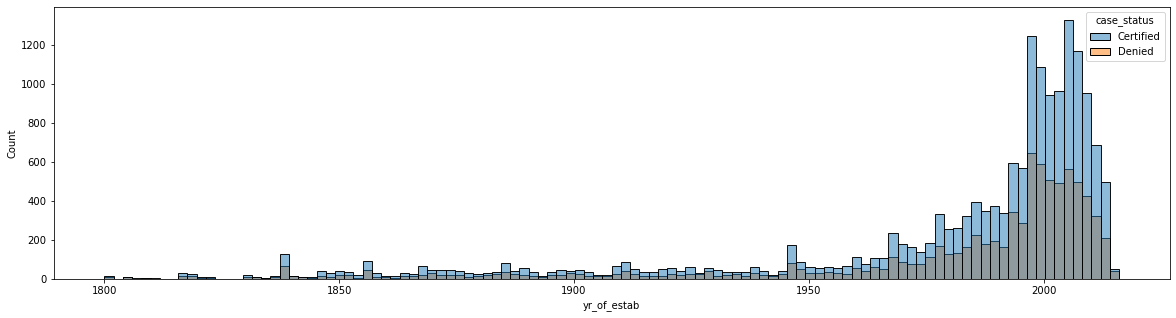

In [84]:
# firm year and case_status
plt.figure(figsize=(20,5))
sns.histplot(df, x="yr_of_estab", hue="case_status");

#### Comments
* The age of a sponsor company does not appear to affect the probability of acceptance (certification) or denial

#### Sponsor company region vs. certification

In [85]:
# sort region by case status
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True)

region_of_employment           
Island                Certified    0.602667
                      Denied       0.397333
Midwest               Certified    0.755282
                      Denied       0.244718
Northeast             Certified    0.629048
                      Denied       0.370952
South                 Certified    0.700157
                      Denied       0.299843
West                  Certified    0.622533
                      Denied       0.377467
Name: case_status, dtype: float64

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


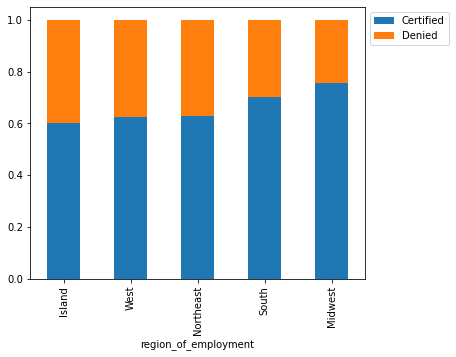

In [86]:
stacked_barplot(df, 'region_of_employment', 'case_status')

#### Comments
* Applications for the Midwest have a 76% success rate, and is the highest success rate
* Applications for the South have a 70% success rate
* Applications for the Northeast have a 63% success rate
* Applications for the West have a 62% success rate
* Applications for the Island have a 60% success rate

#### Prevailing wage vs. certification

In [87]:
df_pay2 = df.copy(deep=True)

* convert week, and month to year, due to sumularities

In [88]:
df_pay2['unit_of_wage'].replace({'Week': 'Year', 'Month': 'Year'}, inplace=True)

* drop hour data due to validity issues

In [89]:
del df_pay2['unit_of_wage']


* Deleate entries with annual salary below the federal minimum wage

In [90]:
# drop records with sponsor employeers with zero or less employees
df_pay2 = df_pay2[df_pay2.prevailing_wage>15080]

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

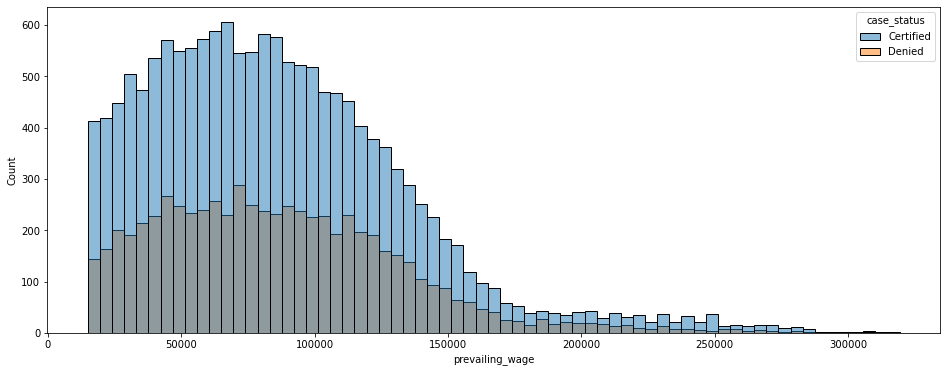

In [91]:
# yearly prevailing wage vs. case_status
plt.figure(figsize=(16,6))
sns.histplot(data=df_pay2, x='prevailing_wage', hue='case_status')

#### Comment
* Prevailing wage does not appear to a noticable impact on certification. Visual evaluations reveals approximatly equal proportion of approved certifications over denied applications across low to high yearly wages.
* Wage distribution right skewed, suggesting many outlier salaries

#### Unit of wage vs. certification

In [92]:
# sort unit of wage by case status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage           
Hour          Denied       0.653686
              Certified    0.346314
Month         Certified    0.617978
              Denied       0.382022
Week          Certified    0.621324
              Denied       0.378676
Year          Certified    0.698850
              Denied       0.301150
Name: case_status, dtype: float64

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


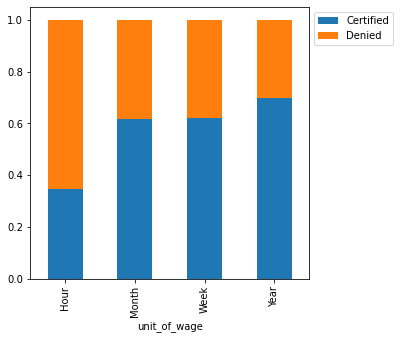

In [93]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

#### Comments
* 70% of Yearly applicants are successful
* 62% of Monthlyapplicants are successful
* 62% of Weekly applicants are successful
* 65% of Hourly applicants are successful

#### Full time position vs. certification

In [94]:
# sort full time by case status
df.groupby('full_time_position')['case_status'].value_counts(normalize=True)

full_time_position           
N                   Certified    0.685260
                    Denied       0.314740
Y                   Certified    0.665832
                    Denied       0.334168
Name: case_status, dtype: float64

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


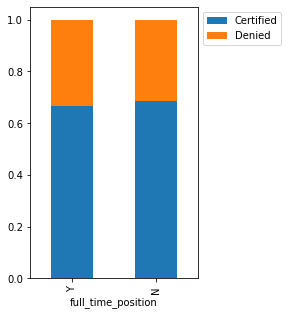

In [95]:
stacked_barplot(df, 'full_time_position', 'case_status')

#### Comments
* 67% of full-time applicants are successful
* 69% of part-time applicants are successful

## **Summary of Exploratory Data Analysis**
**data structure**
* The data file has 25480 records with 12 variables
* This number of records is sufficient for the statistical methods planned.
* no null values or duplicate records identified
* Nine variables are formatted as objects and were converted to a categorical format
* Categorical variables may be converted to dummy variables
* The variable 'yr_of_estab' is formatted as an integer, and many need to be converted to a date format
* The remaining three variables are formatted as integer or floating-point numbers 

**case numbers**
*  The 'case_id' variable has  25480 unique case id numbers, indicating there are no duplicate records
* Plan to drop this variable since it does not contribute to the outcome

**applicant origin**
* Applicants are from Asia, Europe, North America, South America, Africa, and Oceania
* Two-thirds (66.2%) of applications are from Asia
*  43% of all applications are accepted for people originating from Asia and is the largest segment of all applications 
* 80% of all applications from people originating in Europe are successful, and is a greater success rate compared to other locations
*   Plan to convert to dummy variables

**applicant education**
* Degrees listed are Bachelor's, Master's, High School, and Doctorate  
* Most (40%) of applicants have a Bachelor's degree, followed closely with 38% of applicants with a Master, and the smallest proportion is 9% of applicants with a Doctorate, 13% of applicants reported no post-secondary education (high school)
* The majority of successful applicants have a Master’s degree , followed by Bachelor, Doctorial, and last is a high school degree
* Of all degrees, Doctorial applicants enjoy an 87% success rate* Plan to convert to dummy variables

**prior job experience**
*  Coded as Y or N, and does not include the amount of experience in years
*   Majority (58%) of applicants reported previous job experience
* 74% of applicants with job experience are successful
* 56% of applicants without job experience are successful
*  Plan to convert to dummy variables

**training needed**
*  Coded as Y or N and does not include the amount of training required in days, weeks or months, or  years
* Almost 12 % of applications reported the need for job training
* 66% of people who do not need training have successful applications
* 67% of people who need training have successful applications
* Plan to convert to dummy variables

**sponsoring company age**
* The mean year - 1976, youngest firm - 2016, oldest firm - 1800
* The validity of this data is difficult to check 
* There does not appear to be a difference between the number of successful applications compared to denied applications, this variable does not appear to add significant information on success  and  is a candidate for removal 

**number of employees in the sponsoring company**
* the mean number was  5667, min - negative 26, Max – 602K employees
* The three American firms with the most employees are Walmart - 2,200,000, Yum! Brands - 523,000, MacDonald's - 440,000
* There is no company with a negative number of employees
* The age of a sponsor company does not appear to affect the probability of acceptance (certification) or denial
* The validity of this data is suspect, appears not to influence Certification and is a candidate for removal 

**region of employment**
* Regions are Northeast, South, West, Midwest, and Island
* The Northeast (28%), the South (28%), and the West (26%) have roughly the same number of applicants, the Midwest (17%) and Island (2%) have the remaining applicants
* Applications for the Midwest have a 76% success rate, and is the highest success rate
* Applications for the South have a 70% success rate, applications for the Northeast have a 63% success rate, applications for the West have a 62% success rate, and applications for the Island have a 60% success rate
* Plan to convert to dummy variables

**prevailing wage**
* The values are grouped by Year, Month, Week, and Hour payment
* Since the mean prevalent wage is similar to month and week will convert to Year due to misclassification
* Visual evaluations reveal an approximately equal proportion of approved certifications over denied applications across low to high yearly wages. The prevailing wage does not appear to affect the certification
* The validity of this data is suspect and is a candidate for modifications

**unit of wage**
* Coded in four levels Year, Month, Week, and Hour
* The mean annual wage of records coded for the week, month, and year are similar, suggesting misclassification. Plan to re-label month and week records as yearly records
* 70% of Yearly applicants are successful,  62% of Monthly applicants are successful,  62% of Weekly applicants are successful, and 65% of Hourly applicants are successful
* Plan to drop hourly records since they are a small (8.5%) part of the data set

**full-time**
* Coded as Y or N and does not include the number of hours for part-time employees
* 89% of applications are for full-time positions
* 67% of full-time applicants are successful, and  69% of part-time applicants are successful

**case status**
* The dependent variable, and coded as Certified and Denied
* 67% of applications were certified (accepted)
* 33% of applications were denied
* need to recode as 1 and 0

**correlation matrix**
* No strong associations observed

## **Section #4 - Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

* copying data to another data set

In [96]:
# copying data to another data set
df1 = df.copy(deep=True)

#### Check for null variables

In [97]:
# check for missing values
df1.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Check for duplicate records

In [98]:
dup_rows = df1[df1.duplicated()]
dup_rows.sum()

no_of_employees    0.0
yr_of_estab        0.0
prevailing_wage    0.0
dtype: float64

#### Check for outlier data points

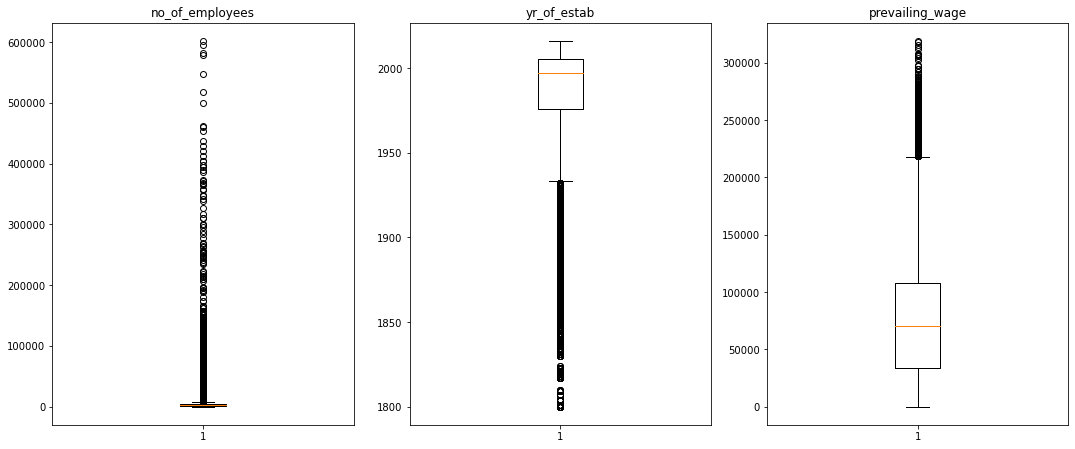

In [99]:
# Outlier detection
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Comments
* Many outliers detected
* will not clip outlier data that will reduce information even if may influence logistic regression results

### Revise data set

* drop case id variable

In [100]:
# drop case_id
df1.drop(labels='case_id', axis=1, inplace=True)

* Drop records with employees less than 1
* keeping firm age eventhough there was little variation affecting certification

In [101]:
# drop records with sponsor employeers with zero or less employees
df1 = df1[df1.no_of_employees>0]


* Appears Monthly, and Weekly wages are misclassified and should be Yearly
* Converting Monthly and Weekly entries to Yearly
* Approximatly 8.5% of records are labeled with a unit_of_wage as Hour. will drop Hour records

In [102]:
df1['unit_of_wage'].replace({'Week': 'Year', 'Month': 'Year'}, inplace=True)

In [103]:
# no need for this variable
# del df1['unit_of_wage']

In [104]:
# drop records with sponsor employeers with zero or less employees
df1 = df1[df1.prevailing_wage>15080]

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21693 entries, 1 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              21693 non-null  category
 1   education_of_employee  21693 non-null  category
 2   has_job_experience     21693 non-null  category
 3   requires_job_training  21693 non-null  category
 4   no_of_employees        21693 non-null  int64   
 5   yr_of_estab            21693 non-null  int64   
 6   region_of_employment   21693 non-null  category
 7   prevailing_wage        21693 non-null  float64 
 8   unit_of_wage           21693 non-null  category
 9   full_time_position     21693 non-null  category
 10  case_status            21693 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 848.6 KB


In [106]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified


## **Section #5 - Mini-Exploritory Data Analysis**

- It is a good idea to explore the data once again after manipulating it.

### Univariate analysis
* Systematic review of each variable in the data set

#### Variable: 'continent'

In [107]:
# Observations of 'continent'
df1.continent.value_counts().T

Asia             14727
Europe            3090
North America     2582
South America      639
Africa             491
Oceania            164
Name: continent, dtype: int64

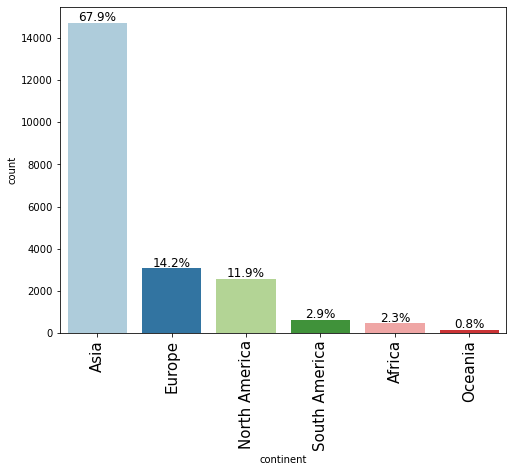

In [108]:
# Observations of 'continent' variable
labeled_barplot(df1, 'continent', perc=True)

#### Comments
* Two thirds (66.2%) of applications are from Asia
* Plan to convert to dummy variables

#### Variable: 'education_of_employee'

In [109]:
# Observations of 'education_of_employee'
df1.education_of_employee.value_counts().T

Bachelor's     8648
Master's       8376
High School    2819
Doctorate      1850
Name: education_of_employee, dtype: int64

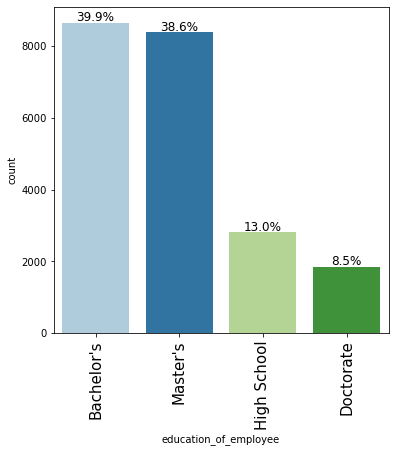

In [110]:
# Observations of 'education_of_employee' variable
labeled_barplot(df1, 'education_of_employee', perc=True)

#### Comments
* Most (40%) of applicants have a Bachelor's degree
* Followed closley with 38% of applicants with a Masters
* The smallest proportion is 9% of applicants with a Doctorate
* 13% of applicants reorted no post secondary education
* Plan to convert to dummy variables

#### Variable: 'has_job_experience'

In [111]:
# Observations of 'has_job_experience'
df1.has_job_experience.value_counts().T

Y    12897
N     8796
Name: has_job_experience, dtype: int64

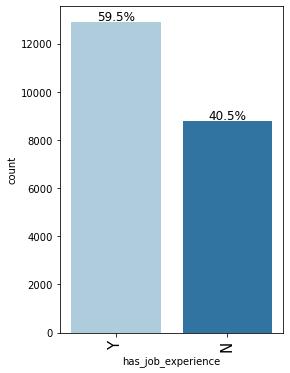

In [112]:
# Observations of 'has_job_experience' variable
labeled_barplot(df1, 'has_job_experience', perc=True)

#### Comments
* Majority (58%) of applicants reported previous job experience
* Plan to convert to dummy variables

#### Variable: 'requires_job_training'

In [113]:
# Observations of 'requires_job_traininge'
df1.requires_job_training.value_counts().T

N    18960
Y     2733
Name: requires_job_training, dtype: int64

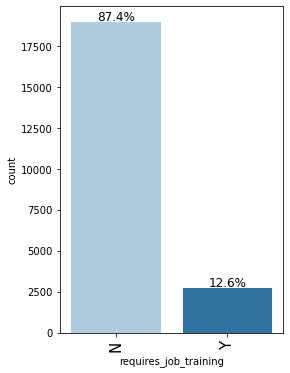

In [114]:
# Observations of 'requires_job_training' variable
labeled_barplot(df1, 'requires_job_training', perc=True)

#### Comments
* almost 12 % of applications reported the need for job training
* Plan to convert to dummy variables

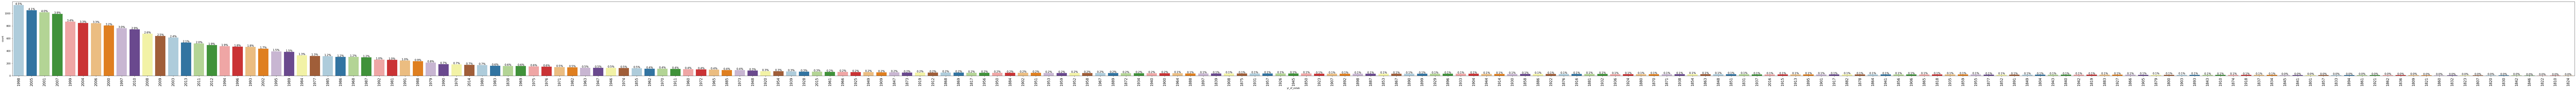

In [115]:
# Observations of 'yr_of_estab' variable
labeled_barplot(df, 'yr_of_estab', perc=True)

#### Comments
* The oldest company reports they were established in the year 1800
* The mean and median report they starting in 1997
* The data is severly right skewed (older firms in the extended tail)

#### Varable: 'region_of_employment'

In [116]:
# Observations of 'region_of_employment'
df1.region_of_employment.value_counts().T

South        5927
Northeast    5837
West         5609
Midwest      3976
Island        344
Name: region_of_employment, dtype: int64

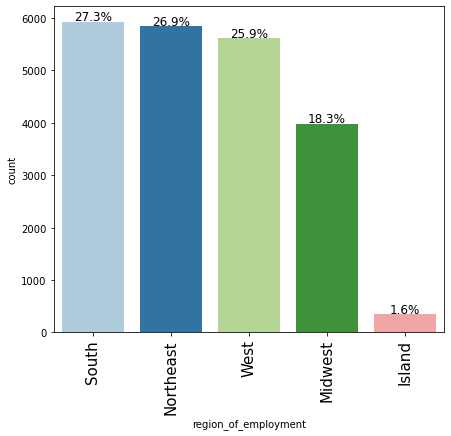

In [117]:
# Observations of 'region_of_employment' variable
labeled_barplot(df1, 'region_of_employment', perc=True)

#### Comments
* The Northeast (28%), the South (28%), and the West (26%) have roughly the same number of applicants
* The Midwest (17%)  and Island (2%) have the remaing applicants
* Plan to convert to dummy variables

#### Varable: 'prevailing_wage'

In [118]:
# drop records with salary less than federal minimum wage
df1 = df1[df1.prevailing_wage>15080]

In [119]:
df1['prevailing_wage'].describe() 

count     21693.000000
mean      86751.596679
std       47398.930126
min       15082.640000
25%       50565.640000
50%       80866.960000
75%      113964.190000
max      319210.270000
Name: prevailing_wage, dtype: float64

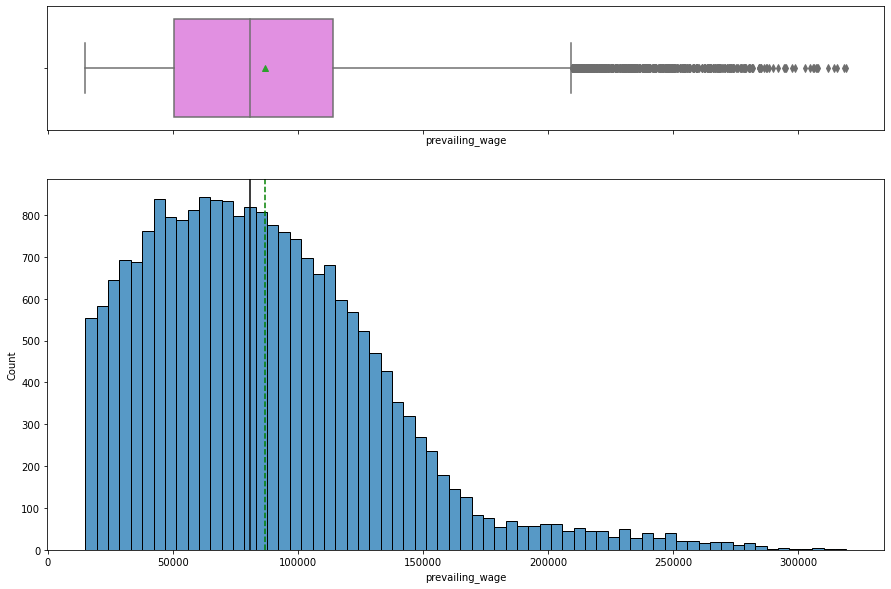

In [120]:
# Prevailing wage for position with yearly salary
histogram_boxplot(df1, 'prevailing_wage')

#### Comments
* The median annual salary - $80, 866, the minimum annual salary - $15,080, the maximum annual salary - $319,210

#### Varable: 'full_time_position'

In [121]:
# Observations of 'full_time_position'
df1.full_time_position.value_counts().T

Y    19068
N     2625
Name: full_time_position, dtype: int64

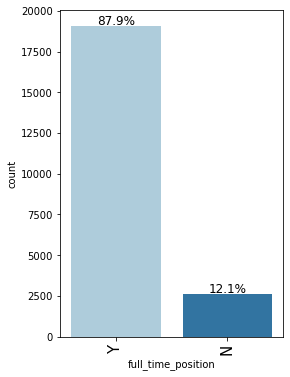

In [122]:
# Observations of 'full_time_position' variable
labeled_barplot(df1, 'full_time_position', perc=True)

#### Comments
* 89% of applications are for full-time position

#### Variable: 'case_status'

In [123]:
# Observations of 'case_status'
df1.case_status.value_counts().T

Certified    15072
Denied        6621
Name: case_status, dtype: int64

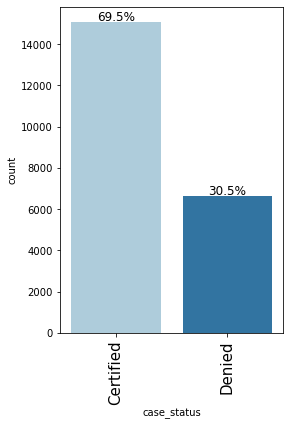

In [124]:
# Observations of 'case_status' variable
labeled_barplot(df1, 'case_status', perc=True)

#### Comment
* 70% of applications were accepted (certified)
* 31% of applications were denied
* Slight difference from inital EDA

### Bivariate Analysis

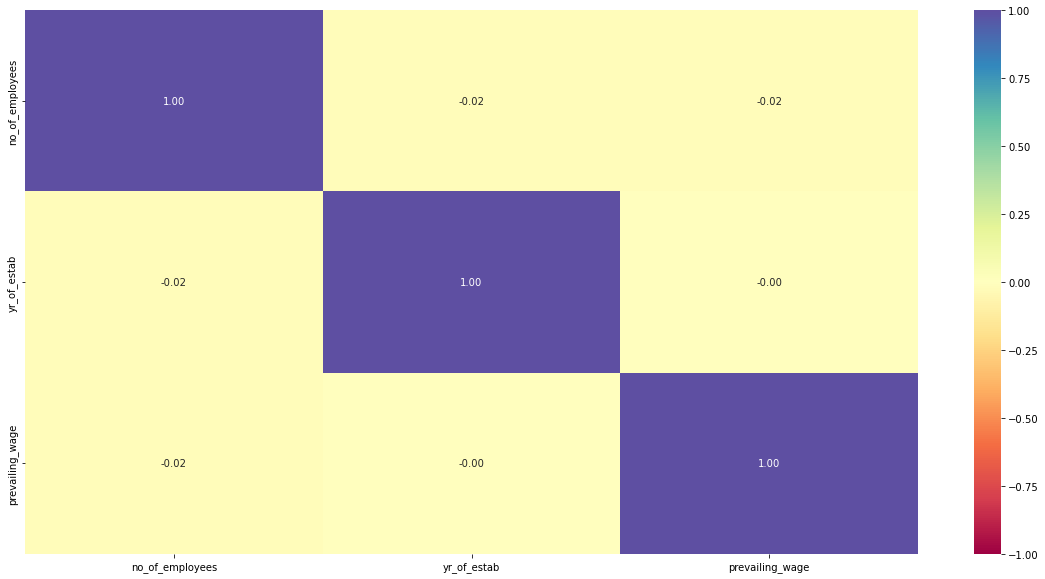

In [125]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

#### Comments

* No strong associations observed

#### Applicant location vs. Certification


In [126]:
# sort continent by case status
df1.groupby('continent')['case_status'].value_counts(normalize=True)

continent               
Africa         Certified    0.753564
               Denied       0.246436
Asia           Certified    0.678889
               Denied       0.321111
Europe         Certified    0.800971
               Denied       0.199029
North America  Certified    0.664601
               Denied       0.335399
Oceania        Certified    0.658537
               Denied       0.341463
South America  Certified    0.633803
               Denied       0.366197
Name: case_status, dtype: float64

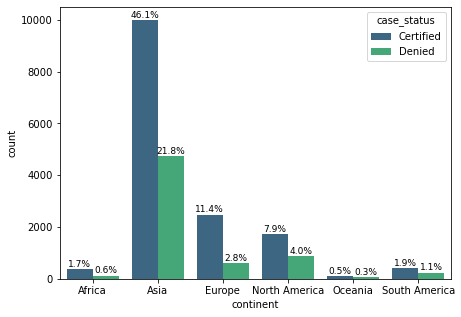

In [127]:
# sort originating location by case status
labeled_barplot2(df1,'continent','case_status', order=None, perc=True)

#### Comment

Of all applications:

* 46% of applications are accepted for people originating from Asia, and is the largest segment of all applications 
* 80% of applications from people originating in Europe are successful, and is a greater success rate compared to other locactions
* Slight difference from inital EDA

#### Applicant education vs. certification

In [128]:
# sort continent by case status
df1.groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee           
Bachelor's             Certified    0.655527
                       Denied       0.344473
Doctorate              Certified    0.878919
                       Denied       0.121081
High School            Denied       0.648457
                       Certified    0.351543
Master's               Certified    0.810172
                       Denied       0.189828
Name: case_status, dtype: float64

case_status            Certified  Denied    All
education_of_employee                          
All                        15072    6621  21693
Bachelor's                  5669    2979   8648
High School                  991    1828   2819
Master's                    6786    1590   8376
Doctorate                   1626     224   1850
------------------------------------------------------------------------------------------------------------------------


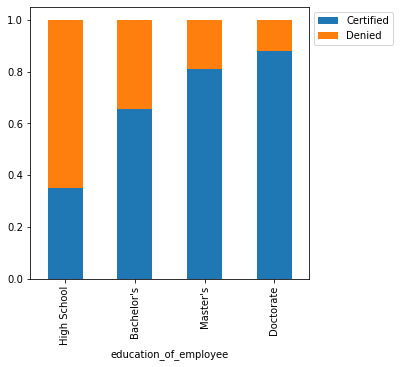

In [129]:
stacked_barplot(df1, 'education_of_employee', 'case_status')

#### Comments
* The majority of successful applicants have a Masters’ degree , followed by Bachelor, Doctorial, and last is a high school degree
* Of all degrees, Doctorial applicants enjoy an 89% success rate
* Slight difference from initial EDA

#### Applicant job experience vs. certification

In [130]:
# sort continent by case status
df1.groupby('has_job_experience')['case_status'].value_counts(normalize=True)

has_job_experience           
N                   Certified    0.598454
                    Denied       0.401546
Y                   Certified    0.760487
                    Denied       0.239513
Name: case_status, dtype: float64

case_status         Certified  Denied    All
has_job_experience                          
All                     15072    6621  21693
N                        5264    3532   8796
Y                        9808    3089  12897
------------------------------------------------------------------------------------------------------------------------


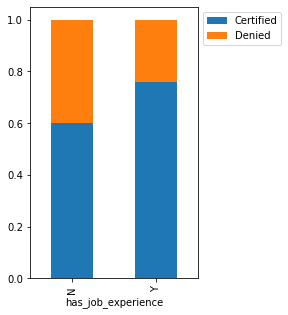

In [131]:
stacked_barplot(df1, 'has_job_experience', 'case_status')

#### Commentsare 
* 76% of applicants with job experience are succesful
* 60% of applicants without job experience are succesful
* Slight difference from initial EDA

#### Applicant requires job training vs. certification

In [132]:
# sort requires_job_training by case status
df1.groupby('requires_job_training')['case_status'].value_counts(normalize=True)

requires_job_training           
N                      Certified    0.696572
                       Denied       0.303428
Y                      Certified    0.682400
                       Denied       0.317600
Name: case_status, dtype: float64

case_status            Certified  Denied    All
requires_job_training                          
All                        15072    6621  21693
N                          13207    5753  18960
Y                           1865     868   2733
------------------------------------------------------------------------------------------------------------------------


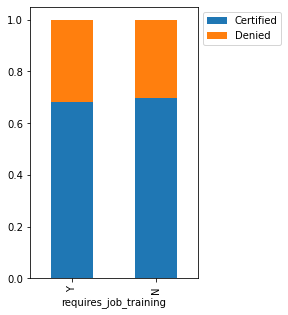

In [133]:
stacked_barplot(df1, 'requires_job_training', 'case_status')

#### Comments
* 68% of people who do not need training have succesful applications
* 67% of people with who needed training have succesful applications

#### Sponsor company region vs. certification

In [134]:
# sort region by case status
df1.groupby('region_of_employment')['case_status'].value_counts(normalize=True)

region_of_employment           
Island                Certified    0.619186
                      Denied       0.380814
Midwest               Certified    0.765091
                      Denied       0.234909
Northeast             Certified    0.666781
                      Denied       0.333219
South                 Certified    0.733423
                      Denied       0.266577
West                  Certified    0.637903
                      Denied       0.362097
Name: case_status, dtype: float64

case_status           Certified  Denied    All
region_of_employment                          
All                       15072    6621  21693
West                       3578    2031   5609
Northeast                  3892    1945   5837
South                      4347    1580   5927
Midwest                    3042     934   3976
Island                      213     131    344
------------------------------------------------------------------------------------------------------------------------


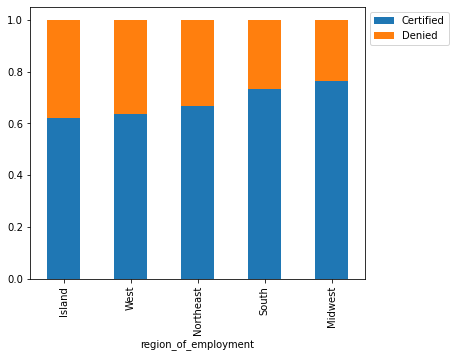

In [135]:
stacked_barplot(df1, 'region_of_employment', 'case_status')

#### Comments
* Applications for the Midwest have a 76% success rate, and is the highest success rate
* Applications for the South have a 70% success rate
* Applications for the Northeast have a 63% success rate
* Applications for the West have a 62% success rate
* Applications for the Island have a 60% success rate

#### Prevailing wage vs. certification

* Deleate entries with annual salary below the federal minimum wage

In [136]:
# drop records with sponsor employeers with zero or less employees
df_pay4 = df1[df1.prevailing_wage>15080]

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

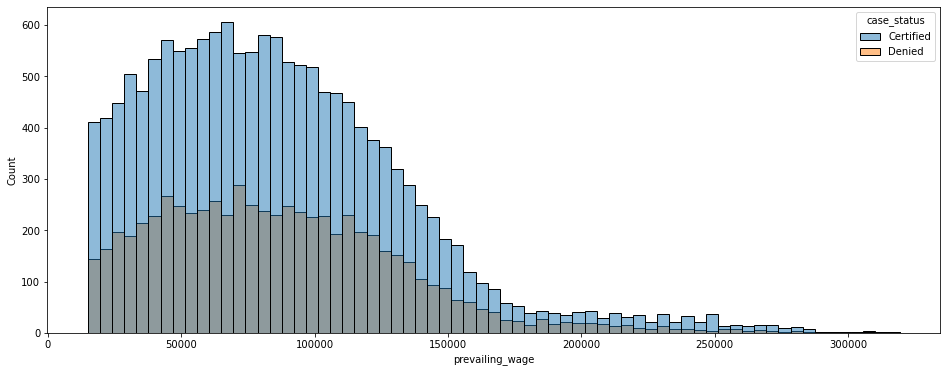

In [137]:
# yearly prevailing wage vs. case_status
plt.figure(figsize=(16,6))
sns.histplot(data=df_pay4, x='prevailing_wage', hue='case_status')

#### Comment
* Prevailing wage does not appear to affect certification
* Visual evaluations reveals approximatly equal proportion of approved certifications over denied applications across low to high yearly wages.

#### Full time position vs. certification

In [138]:
# sort full time by case status
df1.groupby('full_time_position')['case_status'].value_counts(normalize=True)

full_time_position           
N                   Certified    0.693333
                    Denied       0.306667
Y                   Certified    0.694986
                    Denied       0.305014
Name: case_status, dtype: float64

case_status         Certified  Denied    All
full_time_position                          
All                     15072    6621  21693
Y                       13252    5816  19068
N                        1820     805   2625
------------------------------------------------------------------------------------------------------------------------


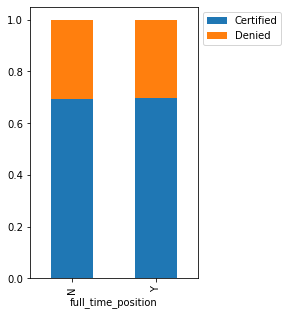

In [139]:
stacked_barplot(df1, 'full_time_position', 'case_status')

#### Comments
* 69% of applications for full-time positions were accepted
* 69% of applicatiosn for part-time positions were 
* Slight difference from initial EDA

## **Summary Mini-Exploratory Data Analysis**
* Sight differences observed from the initial Exploratory Data Analysis.
* All differences are unremarkable

## **Section #6 - Data Preportation for Modeling**

* Convert depandent variable to 0 or 1
* divide independent and dependent variables
* Create dummy variables
* Create traing and testing data sets

In [140]:
# set dependent variable to 0 or 1 
df1['case_status'] = df1['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

In [141]:
# divide independent and dependent variables
X = df1.drop('case_status', axis=1)
y = df1['case_status']

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21693 entries, 1 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              21693 non-null  category
 1   education_of_employee  21693 non-null  category
 2   has_job_experience     21693 non-null  category
 3   requires_job_training  21693 non-null  category
 4   no_of_employees        21693 non-null  int64   
 5   yr_of_estab            21693 non-null  int64   
 6   region_of_employment   21693 non-null  category
 7   prevailing_wage        21693 non-null  float64 
 8   unit_of_wage           21693 non-null  category
 9   full_time_position     21693 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 1.3 MB


In [143]:
X = pd.get_dummies(X, drop_first=True)

* split set for 70% train / 30% test
* stratify option used to keep distribution of classes
* Random set to 1

In [144]:
#Splitting the data into train and test sets in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

* Check desired distribution between train and test data sets

In [145]:
x_train.shape, x_test.shape

((15185, 19), (6508, 19))

In [146]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15185 entries, 9426 to 1311
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    15185 non-null  int64  
 1   yr_of_estab                        15185 non-null  int64  
 2   prevailing_wage                    15185 non-null  float64
 3   continent_Asia                     15185 non-null  uint8  
 4   continent_Europe                   15185 non-null  uint8  
 5   continent_North America            15185 non-null  uint8  
 6   continent_Oceania                  15185 non-null  uint8  
 7   continent_South America            15185 non-null  uint8  
 8   education_of_employee_Doctorate    15185 non-null  uint8  
 9   education_of_employee_High School  15185 non-null  uint8  
 10  education_of_employee_Master's     15185 non-null  uint8  
 11  has_job_experience_Y               15185 non-null  u

In [147]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 11843 to 22047
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    6508 non-null   int64  
 1   yr_of_estab                        6508 non-null   int64  
 2   prevailing_wage                    6508 non-null   float64
 3   continent_Asia                     6508 non-null   uint8  
 4   continent_Europe                   6508 non-null   uint8  
 5   continent_North America            6508 non-null   uint8  
 6   continent_Oceania                  6508 non-null   uint8  
 7   continent_South America            6508 non-null   uint8  
 8   education_of_employee_Doctorate    6508 non-null   uint8  
 9   education_of_employee_High School  6508 non-null   uint8  
 10  education_of_employee_Master's     6508 non-null   uint8  
 11  has_job_experience_Y               6508 non-null   

In [148]:
print('Distribution of classes in training data set:')
print(y_train.value_counts(normalize=True))
print(' ')
print('Distribution of classes in test data set:')
print(y_test.value_counts(normalize=True))

Distribution of classes in training data set:
1    0.694765
0    0.305235
Name: case_status, dtype: float64
 
Distribution of classes in test data set:
1    0.694837
0    0.305163
Name: case_status, dtype: float64


#### Principle performance metric
* Model performance is measured with the F1-Score. The higher the F1-Score, the greater  higher the chances of predicting both the classes correctly

#### Confusion Matrix
* Applicant was approved and the model predicted approval :  True Positive (observed=1, redicted=1)
* Applicant was denied and the model predicted approval : False Positive (observed=0,p redicted=1)
* Applicant was denied and the model predicted denial : True Negative (observed=0, predicted=0)
* Applicant was approved and the model predicted denial : False Negative (observed=1, predicted=0)

#### Load functions to calculate performance metrics and confusion matrix

In [2]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [3]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Section #7 - Building bagging and boosting models**

### Decision Tree Model

* criterion set to gini, and class weights are balanced 

In [151]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')

In [152]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

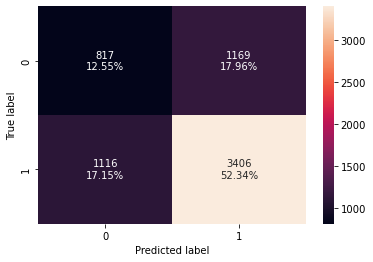

In [153]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree, x_test, y_test)

In [154]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [155]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.648894  0.753207   0.744481  0.748818


* The high performance metrics with the training data and poor performance with the testing data suggest the model is over fittied and unable to generalize

### Bagging Classifier

In [156]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

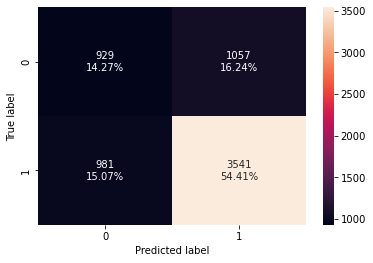

In [157]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging, x_test, y_test)

In [158]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.985051  0.988152   0.990311  0.98923


In [159]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.686847  0.783061   0.770117  0.776535


* Similar to the previous model, high performance with training data but is overfitted resuting in poor performance with the traing data.
* Improved testing F1 score

### Random Forest

In [160]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

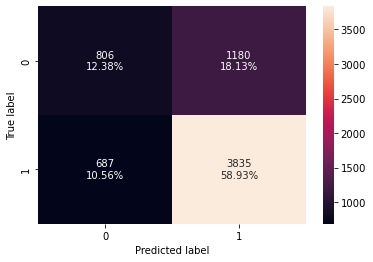

In [161]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf,x_test,y_test)

In [162]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999934     1.0   0.999905  0.999953


In [163]:
rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.713122  0.848076   0.764706  0.804236


* Similar to the previous model, high performance with training data but is overfitted resuting in poor performance with the traing data.
* Higher testing F1 score 

### AdaBoost Classifier

In [164]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

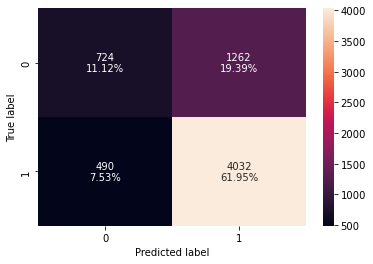

In [165]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(ab_classifier, x_test,y_test)

In [166]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.747909  0.907488   0.770481  0.833391


In [167]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730793  0.891641   0.761617  0.821516


* Similar performance metrics with the training and testing data, suggesting this model is not overfitted.
* Higher testing F1 score

### Gradient Boosting Classifier

In [1]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

NameError: name 'GradientBoostingClassifier' is not defined

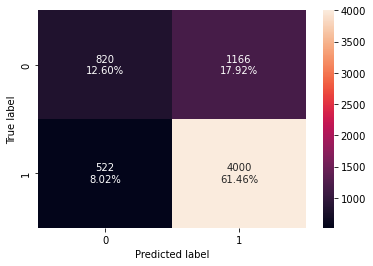

In [169]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gbc, x_test,y_test)

In [170]:
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,x_train,y_train)
print("Training performance \n",gbc_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.762924  0.90218   0.787523  0.840961


In [171]:
gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,x_test,y_test)
print("Training performance \n",gbc_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.740627  0.884564   0.774293  0.825764


* Similar performance metrics with the training and testing data, compared to the last model, and appears the model is not overfitted.
* Improved testing F1 score over all previous models`

### XGBoost Classifier

In [172]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

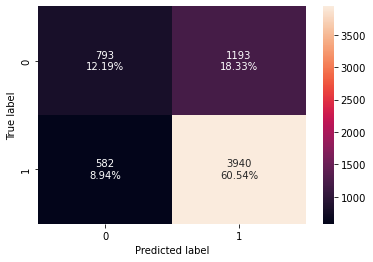

In [173]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(xgb, x_test,y_test)

In [174]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,x_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.852354  0.955829   0.850253  0.899955


In [175]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,x_test,y_test)
print("Training performance \n",xgb_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.727259  0.871296   0.767582  0.816157


* Similar performance metrics with the training and testing data, but not as well as the previuos mode, also this model is not overfitted.
* Testing F1 score is slightly lower

### Base models comparison

In [176]:
# create a dataframe comparing the performance of the base models on the training data

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T, 
     gbc_classifier_model_train_perf.T, 
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.0,0.985051,0.999934,0.747909,0.762924,0.852354
Recall,1.0,0.988152,1.000000,0.907488,0.902180,0.955829
Precision,1.0,0.990311,0.999905,0.770481,0.787523,0.850253
F1,1.0,0.989230,0.999953,0.833391,0.840961,0.899955


In [177]:
# create a dataframe comparing the performance of the base models on the testing data

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T, 
     gbc_classifier_model_test_perf.T, 
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.648894,0.686847,0.713122,0.730793,0.740627,0.727259
Recall,0.753207,0.783061,0.848076,0.891641,0.884564,0.871296
Precision,0.744481,0.770117,0.764706,0.761617,0.774293,0.767582
F1,0.748818,0.776535,0.804236,0.821516,0.825764,0.816157


#### Comments
* From the training data, The Decision Tree, Bagging Classifier, and Random ForestOverall, created over fitted models
* From testing data, AdaBoost Classifier, Gradient Boosting Classifier, and XGBoost Classifier have the high F1 scores

##  **Section #8 - Tuning hyperparameters**
* Will this method improve the model performance?

### Tuning Decision Tree

In [178]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

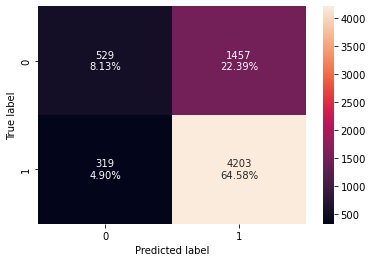

In [179]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

In [180]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.736055  0.936303    0.74754  0.831342


In [181]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.727105  0.929456    0.74258  0.825575


#### Comments
* Due to tuning performance metrics are similar training and testing datasets, suggesting the model is not overfitted
* The tuned model has improved performnce metrics the base model

### Tuning Bagging Classifier

In [182]:
# random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True), 
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=70,
                  random_state=1)

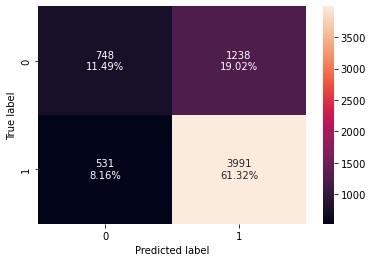

In [183]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bag_tuned, x_test,y_test)

In [184]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.999012  0.999905   0.998675  0.99929


In [185]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, x_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.728181  0.882574   0.763243  0.818583


#### Comments
* The performance metrics in the test model are much higher than the testing model suggesting an overfitted model.
* The tuned model has better performance metrics than the base model.

### Tuning Random Forest

In [186]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

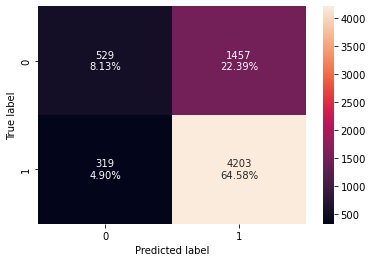

In [187]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [188]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.736055  0.936303    0.74754  0.831342


In [189]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.727105  0.929456    0.74258  0.825575


#### Comments
* This model has similar performance metrics between the training and testing data sets, suggesting the model is not overfitted
* Improved F1 score over the base model.

#### Tuning AdaBoost Classifier

In [190]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=2,
                                                         random_state=1),
                   learning_rate=0.8, n_estimators=10, random_state=1)

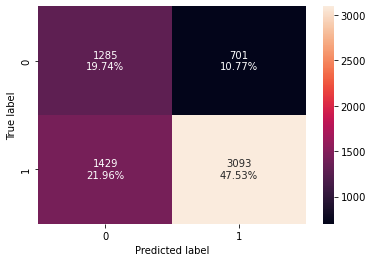

In [191]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(abc_tuned, x_test,y_test)

In [192]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.696543  0.702938   0.834196  0.762963


In [193]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.672711  0.683989   0.815235  0.743867


#### Comments
* The model have simial performance metrics the training and testing datasets, isuggesting the model is not overfitted.
* The tuned model has lower F1 scores, showing lower performance.

#### Tuning GradientBoost Classifier

In [194]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=1, n_estimators=250, random_state=1,
                           subsample=1)

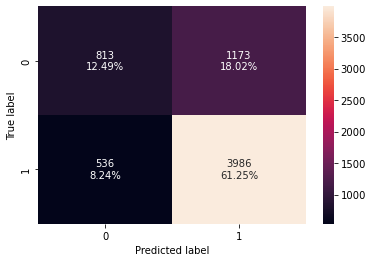

In [195]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_tuned, x_test,y_test)

In [196]:
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.736055  0.936303    0.74754  0.831342


In [197]:
gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.727105  0.929456    0.74258  0.825575


#### Comments
* The performance metrics are similar on both training and testing data sets, suggesting the model is not overfitted.
* The performance is lower than base model

#### Tuning XGB Classifer

In [198]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

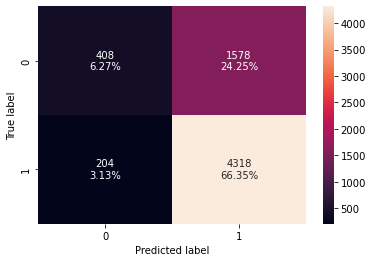

In [199]:
confusion_matrix_sklearn(xgb_tuned, x_test,y_test)

In [200]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, x_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.773066  0.98455   0.759839  0.857721


In [201]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, x_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.726183  0.954887   0.732361  0.82895


#### Comments
* The performance metrics are similar between the testing and traing data set, suggeting the model is not over fitted.
* The F1 score is slightly better than the base model.

### Tuned models comparison

In [202]:
# create a dataframe comparing the performance of the tuned models on the training data

tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T, 
     gb_tuned_model_train_perf.T, 
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.736055,0.999012,0.736055,0.696543,0.736055,0.773066
Recall,0.936303,0.999905,0.936303,0.702938,0.936303,0.984550
Precision,0.747540,0.998675,0.747540,0.834196,0.747540,0.759839
F1,0.831342,0.999290,0.831342,0.762963,0.831342,0.857721


In [203]:
# create a dataframe comparing the performance of the tuned models on the testing data

tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T, 
     gb_tuned_model_test_perf.T, 
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.727105,0.728181,0.727105,0.672711,0.727105,0.726183
Recall,0.929456,0.882574,0.929456,0.683989,0.929456,0.954887
Precision,0.742580,0.763243,0.742580,0.815235,0.742580,0.732361
F1,0.825575,0.818583,0.825575,0.743867,0.825575,0.828950


#### Comments
* From the training data, The Tuned Bagging Classifier, created an over fitted model
* From testing data, all but the Tuned AdaBoot Classifier, have F1 scores ranging from 0.82 - 0.83

## **Section #9 - Model Performance Comparison and Conclusions**

In [204]:
# comapre all models with training data
all_models_train_comp = pd.concat([models_train_comp_df,tuned_models_train_comp_df],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.999934,1.000000,0.999905,0.999953
Tuned Bagging Classifier,0.999012,0.999905,0.998675,0.999290
Bagging Classifier,0.985051,0.988152,0.990311,0.989230
XGBoost Classifier,0.852354,0.955829,0.850253,0.899955
Tuned XGBoost Classifier,0.773066,0.984550,0.759839,0.857721
Gradient Boosting Classifier,0.762924,0.902180,0.787523,0.840961
AdaBoost Classifier,0.747909,0.907488,0.770481,0.833391
Tuned Decision Tree,0.736055,0.936303,0.747540,0.831342
Tuned Random Forest,0.736055,0.936303,0.747540,0.831342


In [205]:
'The best performing model on the training data is the ' + all_models_train_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the training data is the Decision Tree'

In [206]:
# create a dataframe comparing the performance of all models on the testing data
all_models_test_comp = pd.concat([models_test_comp_df,tuned_models_test_comp_df],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Tuned XGBoost Classifier,0.726183,0.954887,0.732361,0.828950
Gradient Boosting Classifier,0.740627,0.884564,0.774293,0.825764
Tuned Decision Tree,0.727105,0.929456,0.742580,0.825575
Tuned Random Forest,0.727105,0.929456,0.742580,0.825575
Tuned Gradient Boosting Classifier,0.727105,0.929456,0.742580,0.825575
AdaBoost Classifier,0.730793,0.891641,0.761617,0.821516
Tuned Bagging Classifier,0.728181,0.882574,0.763243,0.818583
XGBoost Classifier,0.727259,0.871296,0.767582,0.816157
Random Forest,0.713122,0.848076,0.764706,0.804236
Bagging Classifier,0.686847,0.783061,0.770117,0.776535


In [207]:
'The best performing model on the testing data is the ' + all_models_test_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the testing data is the Tuned XGBoost Classifier'

#### Comments
* The Tuned XGBoost Classifer model has the highest F1 score
* Except for the Tuned AdaBoot Classifier, all other Tuned models had F1 scores ranging from 0.82 - 0.83

### Tornado Diagram

In [208]:
"""The importance of features in the tree building 
(The importance of a feature is computed as the (normalized) total 
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(gbc.feature_importances_, columns = ["Imp"], 
                   index = x_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.378891
has_job_experience_Y               0.167052
education_of_employee_Master's     0.094355
continent_Europe                   0.071730
education_of_employee_Doctorate    0.062387
region_of_employment_Midwest       0.041451
region_of_employment_West          0.030542
no_of_employees                    0.026357
region_of_employment_South         0.024442
prevailing_wage                    0.023786


In [209]:
feature_names = x_train.columns

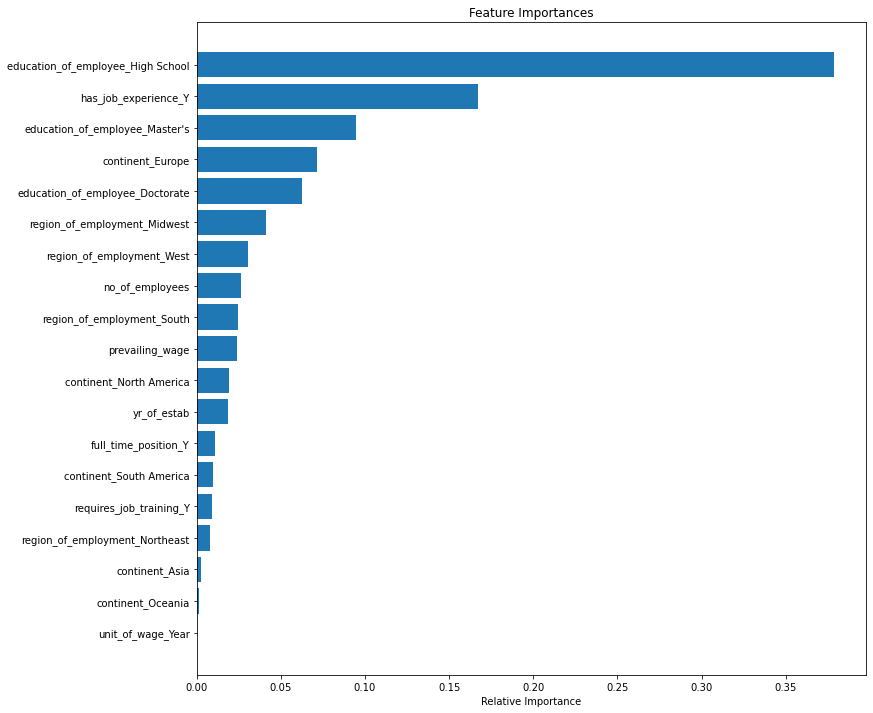

In [210]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Visualization of Decision Tree

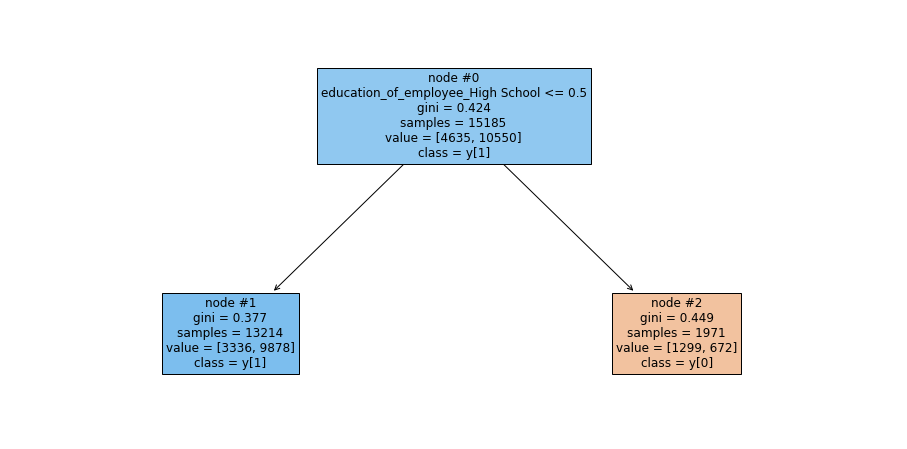

In [211]:
#create visualization of tuned decision-tree model
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

## **Section #10 - Actionable Insights and Recommendations**

###  **Problem Statement**

Companies seek to bring foreign workers into the United States to meet their labor needs when insufficient US workers are available. Attracting the right talent is a crucial factor for companies to remain competitive. When a candidate does not receive Certification, valuable time is lost processing an alternative candidate.

The Office of Foreign Labor Certification (OFLC) is the federal agency tasked to process job certification applications and grant certifications for foreign workers for US employers.

The number of applicants is increasing every Year. The process of reviewing every case is a tedious and time-consuming task. There is a need for a more efficient process to help maintain the US global competitiveness.

### **This analysis provides these deliverables for the client**

OFLC has hired your firm EasyVisa for data-driven solutions that identify candidates with a higher chance of VISA approval. Your firm will build a classification model:

1-  Facilitate the process of visa approvals.

2-  Recommend a suitable profile for the applicants for whom the Visa should be certified or denied based on the drivers that significantly influence the case status. 


###  **Insights**
Inform the Office Inform Office of Foreign Labor Certification (OFLC) that there are four key applicant attributes that drive successful certification. :

**#1 - Education level** Bypass applications for positions that require a high school diploma. These applications have a low success rate. Prioritize positions that require a Masters degree or a Doctorate degree because these applicants have favorable success rates.

**#2 - Prior job experience** Prioritize applications for candidates with prior job experience. These candidates have favorable success rates compared to applicants without prior experience. 

**#3 - Originating continent** Applicants from Europe have a higher success rate than all the other continents. Applicants from North America and South America have the next best success rates.

**#4 - Region of employment** Positions located in the US Midwest have a higher success rate than all the other regions. Positions located in in the US West and US South should be processed afterwards.
     
#### **Recommendations**
To prioritize limited resources towards screening a batch of applications for those most likely to be approved, the OFLC can:

1- In real-time, separate applications by the applicant’s level of education. Prioritize reviewing post-graduate degrees first. Address applicants with  bachelor’s and high school degrees as the workload permits.

2- Divide applications by previous job experience and no job experience. Prioritize the review of applicants with prior job experience.

3- Prioritize applications from Europe. Followed by applications from North America and South America. 

4- Sort the remaining applications by the employment location. Prioritize applications for positions in the Midwest. Followed by positions located in the West and South.